<a href="https://colab.research.google.com/github/jungeun919/Pytorch_study/blob/main/VGG_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

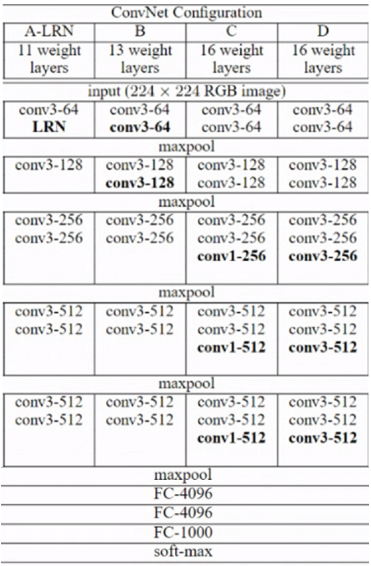

# test_1

In [14]:
import torch
from torch import nn, Tensor
# import torch.nn as nn


class VGG16(nn.Module): #모든 신경망 모듈의 기본이 되는 클래스
  def __init__(self):
    super().__init__()  #super()로 기반 클래스(VGG16)의 __init__ 메서드 호출, super()는 상속받은 부모 클래스를 의미
    self.layer11 = nn.Conv2d(
        in_channels=3, out_channels=64,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.layer12 = nn.Conv2d(
        in_channels=64, out_channels=64,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)


    self.layer21 = nn.Conv2d(
        in_channels=64, out_channels=128,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.layer22 = nn.Conv2d(
        in_channels=128, out_channels=128,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)


    self.layer31 = nn.Conv2d(
        in_channels=128, out_channels=256,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.layer32 = nn.Conv2d(
        in_channels=256, out_channels=256,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.layer33 = nn.Conv2d(
        in_channels=256, out_channels=256,
        kernel_size=1, stride=1,
        padding=1, bias=False
    )
    self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer41 = nn.Conv2d(
        in_channels=256, out_channels=512,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.layer42 = nn.Conv2d(
        in_channels=512, out_channels=512,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.layer43 = nn.Conv2d(
        in_channels=512, out_channels=512,
        kernel_size=1, stride=1,
        padding=1, bias=False
    )
    self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.layer51 = nn.Conv2d(
        in_channels=512, out_channels=512,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.layer52 = nn.Conv2d(
        in_channels=512, out_channels=512,
        kernel_size=3, stride=1,
        padding=1, bias=False
    )
    self.layer53 = nn.Conv2d(
        in_channels=512, out_channels=512,
        kernel_size=1, stride=1,
        padding=1, bias=False
    )
    self.maxpool5 = nn.MaxPool2d(kernel_size=2, stride=2)

# test_2

In [2]:
import torch
from torch import nn, Tensor
import torch.nn.functional as F
# import torch.nn as nn


class vgg16(nn.Module): #모든 신경망 모듈의 기본이 되는 클래스
  def __init__(
      self,
      in_channels: int = 3
  ) -> None:
    super().__init__()  #super()로 기반 클래스(vgg16)의 __init__ 메서드 호출, super()는 상속받은 부모 클래스를 의미
    self.conv1_1 = nn.Conv2d(in_channels, 64, kernel_size=3, padding=1)
    self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.conv2_2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

    self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
    self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
    self.conv3_3 = nn.Conv2d(256, 256, kernel_size=1, padding=1)

    self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
    self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.conv4_3 = nn.Conv2d(512, 512, kernel_size=1, padding=1)

    self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.conv5_3 = nn.Conv2d(512, 512, kernel_size=1, padding=1)

    # self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
    self.pool = nn.AdaptiveAvgPool2d((7, 7))

    self.fc6 = nn.Linear(in_features=512*7*7, out_features=4096)
    self.fc7 = nn.Linear(in_features=4096, out_features=4096)
    self.fc8 = nn.Linear(in_features=4096, out_features=1000)


  def forward(self, x):
    x = F.relu(self.conv1_1(x))
    x = F.relu(self.conv1_2(x))
    x = self.pool(x)
    x = F.relu(self.conv2_1(x))
    x = F.relu(self.conv2_2(x))
    x = self.pool(x)
    x = F.relu(self.conv3_1(x))
    x = F.relu(self.conv3_2(x))
    x = F.relu(self.conv3_3(x))
    x = self.pool(x)
    x = F.relu(self.conv4_1(x))
    x = F.relu(self.conv4_2(x))
    x = F.relu(self.conv4_3(x))
    x = self.pool(x)
    x = F.relu(self.conv5_1(x))
    x = F.relu(self.conv5_2(x))
    x = F.relu(self.conv5_3(x))
    x = self.pool(x)

    x = x.view(-1, 7*7*512)

    x = F.relu(self.fc6(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc8(x))
    return x

if __name__ == '__main__':
  from torchsummary import summary
  from torchvision.models import vgg16

  print()
  # model = vgg16(in_channels=3).to('cuda')
  # print(summary(model, input_data=(3, 224, 224), verbose=0))

  model = vgg16(pretrained=False)
  for m in model.modules():
    print(m)
  print(summary(model, (3, 224, 224)))


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

# test_3

In [25]:
import torch
from torch import nn, Tensor
import torch.nn.functional as F
# import torch.nn as nn


class Conv2dReLU(nn.Sequential):
  def __init__(
      self,
      in_channels: int,
      out_channels: int,
      kernel_size: int = 3,
      padding: int = 1
  ) -> nn.Sequential:
      super().__init(
          nn.Conv2d(
              in_channels=in_channels,
              out_channels=out_channels,
              kernel_size=kernel_size,
              padding=padding),
          nn.ReLU()
      )


class vgg16(nn.Module): #모든 신경망 모듈의 기본이 되는 클래스
  def __init__(
      self,
      in_channels: int = 3
  ) -> None:
    super().__init__()  #super()로 기반 클래스(vgg16)의 __init__ 메서드 호출, super()는 상속받은 부모 클래스를 의미
    self.conv1 = nn.Conv2dReLU(in_channels, out_channels=64)

    self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.conv2_2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

    self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
    self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
    self.conv3_3 = nn.Conv2d(256, 256, kernel_size=1, padding=1)

    self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
    self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.conv4_3 = nn.Conv2d(512, 512, kernel_size=1, padding=1)

    self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.conv5_3 = nn.Conv2d(512, 512, kernel_size=1, padding=1)

    # self.pool = nn.MaxPool2d(2, 2) #kernel_size, stride
    self.pool = nn.AdaptiveAvgPool2d((7, 7))

    self.fc6 = nn.Linear(in_features=512*7*7, out_features=4096)
    self.fc7 = nn.Linear(in_features=4096, out_features=4096)
    self.fc8 = nn.Linear(in_features=4096, out_features=1000)


  def forward(self, x):
    x = F.relu(self.conv1_1(x))
    x = F.relu(self.conv1_2(x))
    x = self.pool(x)
    x = F.relu(self.conv2_1(x))
    x = F.relu(self.conv2_2(x))
    x = self.pool(x)
    x = F.relu(self.conv3_1(x))
    x = F.relu(self.conv3_2(x))
    x = F.relu(self.conv3_3(x))
    x = self.pool(x)
    x = F.relu(self.conv4_1(x))
    x = F.relu(self.conv4_2(x))
    x = F.relu(self.conv4_3(x))
    x = self.pool(x)
    x = F.relu(self.conv5_1(x))
    x = F.relu(self.conv5_2(x))
    x = F.relu(self.conv5_3(x))
    x = self.pool(x)

    x = x.view(-1, 7*7*512)

    x = F.relu(self.fc6(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc8(x))
    return x

if __name__ == '__main__':
  from torchsummary import summary
  from torchvision.models import vgg16

  print()
  # model = vgg16(in_channels=3).to('cuda')
  # print(summary(model, input_data=(3, 224, 224), verbose=0))

  model = vgg16(pretrained=False)
  for m in model.modules():
    print(m)
  print(summary(model, (3, 224, 224)))


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=

# test_4
##### Final VGG Model (21.01.25)

In [3]:
from typing import Tuple, List
import torch
from torch import nn, Tensor, mode
import torch.nn.functional as F
# import torch.nn as nn


cfgs = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'],
    'C': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'],
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],
}


class Conv2dx2ReLU(nn.Sequential):
  def __init__(
      self,
      in_channels: int,
      out_channels: int,
      kernel_size: int = 3,
      padding: int = 1,
      num_layers: int = 3
  ) -> nn.Sequential:
      _layer = []
      for _ in range(num_layers):
        _layer += [
                   nn.Conv2d(in_channels, out_channels, kernel_size=3),
                   nn.ReLU
        ]
      super().__init(*_layer)


class vgg16(nn.Module): #모든 신경망 모듈의 기본이 되는 클래스
  def __init__(
      self,
      in_channels: int = 3
  ) -> None:
    super().__init__()  #super()로 기반 클래스(vgg16)의 __init__ 메서드 호출, super()는 상속받은 부모 클래스를 의미
    self.conv1 = nn.Conv2dx2ReLU(in_channels, out_channels=64)
    self.conv2 = nn.Conv2dx2ReLU(in_channels=64, out_channels=128)
    self.conv3 = nn.Conv2dx2ReLU(in_channels=128, out_channels=256)
    self.conv4 = nn.Conv2dx2ReLU(in_channels=256, out_channels=512)
    self.conv5 = nn.Conv2dx2ReLU(in_channels=512, out_channels=512)

    self.pool = nn.AdaptiveAvgPool2d((7, 7))

    self.fc6 = nn.Linear(in_features=512*7*7, out_features=4096)
    self.fc7 = nn.Linear(in_features=4096, out_features=4096)
    self.fc8 = nn.Linear(in_features=4096, out_features=1000)


  def forward(self, x: Tensor) -> Tensor:
    x = self.conv1(x)
    x = self.maxpool(x)
    x = self.conv2(x)
    x = self.maxpool(x)
    x = self.conv3(x)
    x = self.maxpool(x)
    x = self.conv4(x)
    x = self.maxpool(x)
    x = self.conv5(x)
    x = self.avgpool(x)

    x = x.view(-1, 7*7*512)

    x = F.relu(self.fc6(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc8(x))

    return x


if __name__ == '__main__':
  from torchsummary import summary
  from torchvision.models import vgg16

  model = vgg16(pretrained=False)
  for m in model.modules():
    print(m)
  print(summary(model, (3, 224, 224)))

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1